# Tugas
Buatlah sebuah model K-Means dengan ketentuan,

1. Gunakan data 'Mall_Customers.csv'

2. Tentukan fitur apa yang tepat untuk melakukan clustering (minimal 2)

3. Buatlah model K-Means dengan mempertimbangkan jumlah k yang terbaik.

4. Buatlah  implementasi model SOM untuk segmentasi citra lain

In [2]:
# Import library yang diperlukan
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [3]:
# Load data
df = pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
# Memilih fitur untuk clustering
# Memilih fitur Annual Income (k$) dan Spending Score (1-100)
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

# Standarisasi Data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [9]:
# Menentukan k terbaik menggunakan Metode Elbow
wcss = []  # within-cluster sum of squares
for i in range(1, 10):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

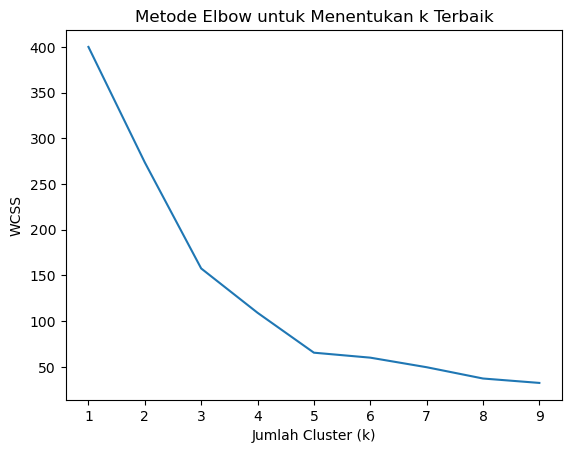

In [10]:
# Plot hasil Elbow method
plt.plot(range(1, 10), wcss)
plt.title('Metode Elbow untuk Menentukan k Terbaik')
plt.xlabel('Jumlah Cluster (k)')
plt.ylabel('WCSS')
plt.show()

In [11]:
# Membuat model K-Means dengan k terbaik (misalnya k=5 berdasarkan Elbow plot)
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(X_scaled)

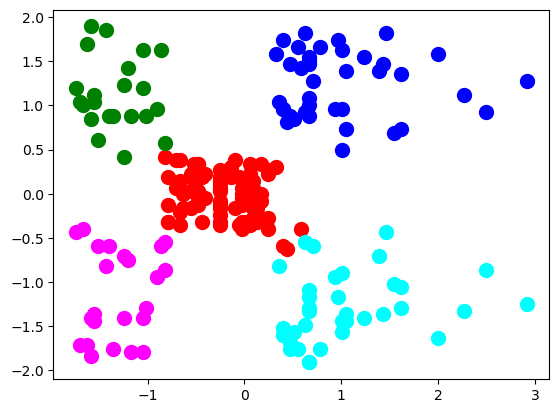

In [12]:
# Visualisasi Hasil Clustering
plt.scatter(X_scaled[y_kmeans == 0, 0], X_scaled[y_kmeans == 0, 1], s=100, c='red', label='Cluster 1')
plt.scatter(X_scaled[y_kmeans == 1, 0], X_scaled[y_kmeans == 1, 1], s=100, c='blue', label='Cluster 2')
plt.scatter(X_scaled[y_kmeans == 2, 0], X_scaled[y_kmeans == 2, 1], s=100, c='green', label='Cluster 3')
plt.scatter(X_scaled[y_kmeans == 3, 0], X_scaled[y_kmeans == 3, 1], s=100, c='cyan', label='Cluster 4')
plt.scatter(X_scaled[y_kmeans == 4, 0], X_scaled[y_kmeans == 4, 1], s=100, c='magenta', label='Cluster 5')

# Implementasi Self-Organizing Maps (SOM) untuk Segmentasi Citra


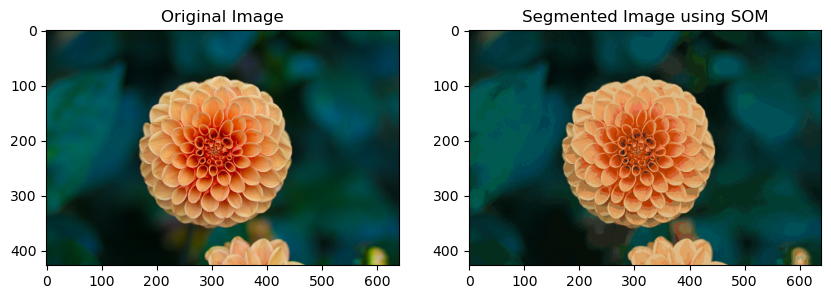

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_sample_image
from minisom import MiniSom

# 1. Memuat Citra Sampel
image = load_sample_image("flower.jpg")  # Menggunakan gambar sampel
image = np.array(image, dtype=np.float64) / 255  # Normalisasi nilai piksel (0-1)
w, h, d = image.shape
pixels = np.reshape(image, (w * h, d))  # Merubah bentuk citra menjadi array 2D

# 2. Membuat model SOM
som = MiniSom(x=10, y=10, input_len=3, sigma=1.0, learning_rate=0.5)  # SOM dengan grid 10x10
som.random_weights_init(pixels)
som.train_random(pixels, 100)  # Melatih SOM

# 3. Mengelompokkan piksel berdasarkan SOM
qnt = som.quantization(pixels)  # Menghitung hasil cluster dari SOM

# 4. Membentuk citra baru berdasarkan cluster
segmented_image = np.reshape(qnt, (w, h, d))

# 5. Menampilkan citra asli dan citra hasil segmentasi
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(image)

plt.subplot(1, 2, 2)
plt.title("Segmented Image using SOM")
plt.imshow(segmented_image)

plt.show()
